In [1]:
import pandas as pd
from hnmchallenge.data_reader import DataReader
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from hnmchallenge.dataset import Dataset
from hnmchallenge.filtered_dataset import FilterdDataset
from hnmchallenge.models.top_pop import TopPop
from hnmchallenge.evaluation.python_evaluation import map_at_k
from hnmchallenge.constant import *

In [2]:
import logging
logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)

In [5]:
dataset1 = FilterdDataset()
dr1 = DataReader()

In [6]:
fd1 = dr1.get_filtered_full_data()

In [7]:
item_per_user1 = fd1.groupby("customer_id")["article_id"].apply(list)

In [8]:
unique_item_per_user1 = item_per_user1.apply(np.unique)

In [9]:
df_multiple1 = item_per_user1.to_frame()
df_unique1 = unique_item_per_user1.to_frame()

In [10]:
df_multiple1["count"] = df_multiple1.apply(lambda row: len(row["article_id"]), axis=1)
df_unique1["count"] = df_unique1.apply(lambda row: len(row["article_id"]), axis=1)

In [12]:
merge_df1 = pd.merge(df_multiple1, df_unique1, on="customer_id")

In [13]:
merge_df1["diff"] = 1 - (merge_df1["count_y"]/merge_df1["count_x"])

Text(0.5, 0, 'user tendency buying multiple items')

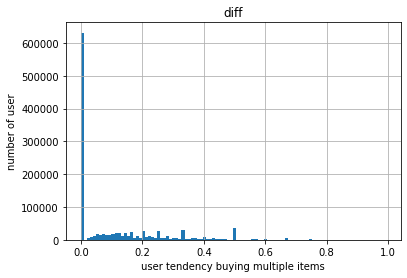

In [14]:
merge_df1.hist("diff", bins=100)
plt.ylabel("number of user")
plt.xlabel("user tendency buying multiple items")

In [15]:
merge_df1.head()

,article_id_x,count_x,article_id_y,count_y,diff
customer_id,,,,,
0,"[0, 0, 0, 644, 1952, 1952, 1482, 1638, 1797, 4...",14,"[0, 644, 1482, 1638, 1652, 1797, 1952, 4861, 7...",11,0.214286
1,"[1, 482, 759, 2006, 339, 339, 6018, 7534, 7534...",24,"[1, 339, 482, 759, 981, 1482, 2006, 2427, 2997...",21,0.125000
2,"[2, 326, 2055, 2238, 4151, 309, 5786, 5174, 54...",26,"[2, 9, 196, 248, 249, 309, 326, 2055, 2238, 30...",26,0.000000
3,"[3, 3, 3, 2596, 3936, 632, 3]",7,"[3, 632, 2596, 3936]",4,0.428571
4,[4],1,[4],1,0.000000


In [17]:
user_diff=merge_df1.drop(["article_id_x","count_x","article_id_y","count_y"], axis=1)

In [18]:
user_diff.head()

,diff
customer_id,
0,0.214286
1,0.125000
2,0.000000
3,0.428571
4,0.000000


In [23]:
user_diff.reset_index(level=0, inplace=True)

In [24]:
dr = DataReader()
transaction = dr.get_filtered_full_data()
item_per_user1 = transaction.groupby("customer_id")["article_id"].apply(list)
unique_item_per_user1 = item_per_user1.apply(np.unique)
df_multiple1 = item_per_user1.to_frame()
df_unique1 = unique_item_per_user1.to_frame()
df_multiple1["count"] = df_multiple1.apply(lambda row: len(row["article_id"]), axis=1)
df_unique1["count"] = df_unique1.apply(lambda row: len(row["article_id"]), axis=1)
merge_df1 = pd.merge(df_multiple1, df_unique1, on="customer_id")
merge_df1["diff"] = 1 - (merge_df1["count_y"]/merge_df1["count_x"])
user_diff=merge_df1.drop(["article_id_x","count_x","article_id_y","count_y"], axis=1)
user_diff.reset_index(level=0, inplace=True)
user_diff.to_feather(dr.get_preprocessed_data_path() / "filtered_split_user_multiple_buy.feather")

PermissionError: [Errno 13] Permission denied: '/home/aayush/../edoardo/hnm_data/preprocessed/filtered_split_user_multiple_buy.feather'

In [ ]:
def get_user_multiply_buy(self) -> pd.DataFrame:
    dr = DataReader()
    p = dr.get_preprocessed_data_path()
    user_diff_score = pd.read_feather(p /"filtered_split_user_multiple_buy.feather", columns=None, use_threads=True)
    return user_diff_score